In [28]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

# Experimenting and Precode

In [47]:
base = "C:/Users/leahz/OneDrive/Desktop/Quizlet/ATC4/SYSlab"

# with open(f'{base}/data/data_all.pkl', 'rb') as f:
#     data =  pickle.load(f)
data_premade = pd.read_pickle(f'{base}/data/data_all.pkl') # This is the data after being preprocessed has index not filename
data_original = pd.read_pickle(f'G:/My Drive/Sys Lab/modified_data/new/modified_all.pkl') # This is the orginal data, it has the filename
data_spirals = pd.read_pickle(f"{base}/data/data_original_spiral.pkl")

leng = range(len(data_premade))

In [31]:
data_premade

,X,y,index,target
0,"[-2.056546340567396, -2.056546340567396, -1.47...","[-1.3952663046302018, -1.3952663046302018, -1....",70473,"[1.4489303763088408, 1.8748890968469032]"
1,"[1.66737406371331, 1.66737406371331, 1.6673740...","[-1.9952172111690554, -1.9952172111690554, -1....",74844,"[-1.7725966988020012, 2.7933040956366777]"
2,"[0.18022639872047436, -0.056913599595946544, -...","[-1.6533837631420183, -1.5283169126774179, -1....",95145,"[2.788766380201092, 1.973554900331396]"
3,"[-1.8480943565342245, -1.7263490102539736, -1....","[1.803269661665738, 1.3158994828371586, 1.3158...",55640,"[1.499902666172703, -2.0956917689628964]"
4,"[-2.2259955480133455, -1.8726629213445662, -1....","[1.7763555742918122, 1.680749784502156, 1.4895...",31735,"[2.0139959720120904, -2.0478760172944392]"
...,...,...,...,...
32189,"[-1.9470036496822107, -1.9470036496822107, -1....","[-2.201704178130174, -2.201704178130174, -2.20...",139013,"[1.7265881421710167, 1.7704425349912787]"
32190,"[2.2845990353241943, 2.2845990353241943, 2.284...","[2.1226745220209273, 2.1226745220209273, 2.122...",93198,"[-0.8449886842978346, -1.288766674084138]"
32191,"[1.6461582494510627, 1.4821982644459757, 1.482...","[-1.5432260242699338, -1.444554283587713, -1.4...",42403,"[-1.633041450650661, 1.7129414182433536]"
32192,"[-1.9279335090084688, -1.9279335090084688, -1....","[-0.8164965809276795, -0.8164965809276795, -0....",62161,"[1.2675363954254597, 1.2247448713916351]"


In [4]:
def taylor_smooth(t, f, window_size=5):
    smoothed = np.zeros_like(f)
    half_window = window_size // 2
    
    for i in range(len(f)):
        start = max(0, i - half_window)
        end = min(len(f), i + half_window + 1)
        local_t = t[start:end]
        local_f = f[start:end]
        coeffs = np.polyfit(local_t - t[i], local_f, 1)
        smoothed[i] = np.polyval(coeffs, 0)  # Evaluate at t[i]
    
    return smoothed

In [5]:
tempx = data_premade['X'].iloc[10]
tempy = data_premade['y'].iloc[10]
t = np.linspace(0, len(tempy)) 


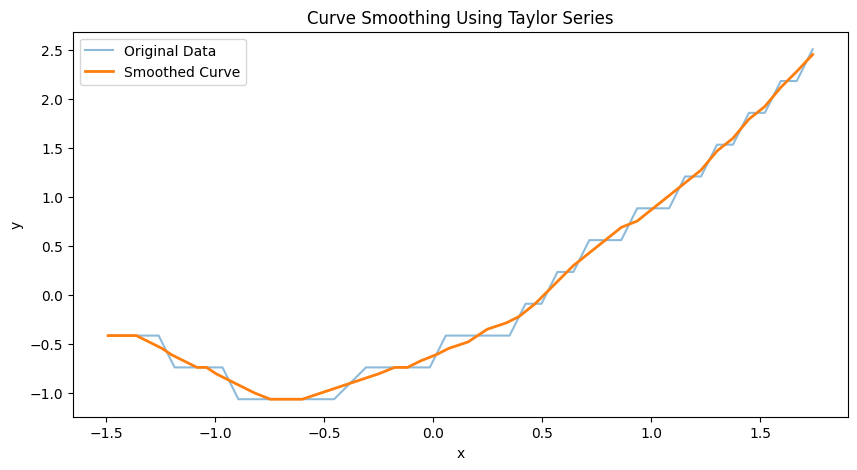

In [6]:
# Smooth x and y curves
x_smooth = taylor_smooth(t, tempx)
y_smooth = taylor_smooth(t, tempy)

# Plot original and smoothed curves
plt.figure(figsize=(10, 5))
plt.plot(tempx, tempy, label='Original Data', alpha=0.5)
plt.plot(x_smooth, y_smooth, label='Smoothed Curve', linewidth=2)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve Smoothing Using Taylor Series')
plt.show()

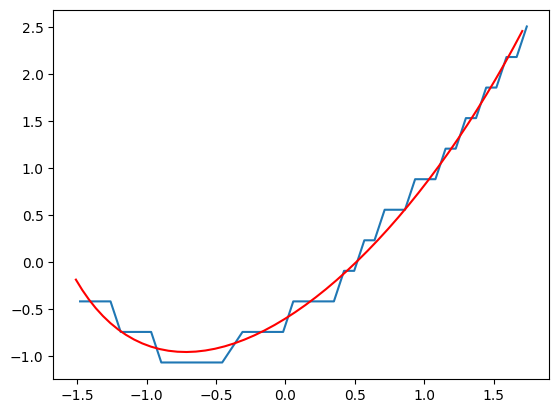

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


xhat = savgol_filter(tempx, 49, 3)
yhat = savgol_filter(tempy, 49, 3) 

plt.plot(tempx,tempy)
plt.plot(xhat,yhat, color='red')
plt.show()


# ML Approach

In [32]:
controls = pd.read_pickle("./data/controls.pkl")
data_original = pd.read_pickle(f'G:/My Drive/Sys Lab/modified_data/new/modified_all.pkl') # This is the orginal data, it has the filename


In [33]:
data_original

,Filename,index,angle,X,y,length
0,./data/hw_dataset/parkinson/P_02100001.txt,51,144,"[197.8960113960114, 197.8960113960114, 197.896...","[207.0, 207.0, 207.0, 208.0, 208.0, 208.0, 209...",50
1,./data/hw_dataset/parkinson/P_02100001.txt,52,21,"[197.8960113960114, 197.8960113960114, 197.896...","[207.0, 207.0, 208.0, 208.0, 208.0, 209.0, 209...",50
2,./data/hw_dataset/parkinson/P_02100001.txt,53,117,"[197.8960113960114, 197.8960113960114, 197.896...","[207.0, 208.0, 208.0, 208.0, 209.0, 209.0, 209...",50
3,./data/hw_dataset/parkinson/P_02100001.txt,54,282,"[197.8960113960114, 197.8960113960114, 197.896...","[208.0, 208.0, 208.0, 209.0, 209.0, 209.0, 209...",50
4,./data/hw_dataset/parkinson/P_02100001.txt,55,142,"[197.8960113960114, 197.8960113960114, 197.896...","[208.0, 208.0, 209.0, 209.0, 209.0, 209.0, 210...",50
...,...,...,...,...,...,...
162362,./data/new_dataset/parkinson/H_p000-0043.txt,1755,19,"[395.7121409921671, 395.7121409921671, 396.676...","[215.0, 208.0, 202.0, 197.0, 193.0, 190.0, 188...",50
162363,./data/new_dataset/parkinson/H_p000-0043.txt,1756,35,"[395.7121409921671, 396.6762402088773, 396.676...","[208.0, 202.0, 197.0, 193.0, 190.0, 188.0, 186...",50
162364,./data/new_dataset/parkinson/H_p000-0043.txt,1757,199,"[396.6762402088773, 396.6762402088773, 397.640...","[202.0, 197.0, 193.0, 190.0, 188.0, 186.0, 186...",50
162365,./data/new_dataset/parkinson/H_p000-0043.txt,1758,306,"[396.6762402088773, 397.64033942558746, 398.60...","[197.0, 193.0, 190.0, 188.0, 186.0, 186.0, 186...",50


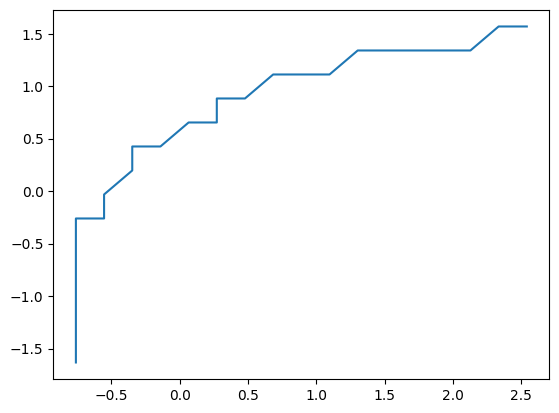

In [49]:
r = data_premade.iloc[0]
r2 = data_original.iloc[r['index']]
plt.plot(r["X"], r["y"])

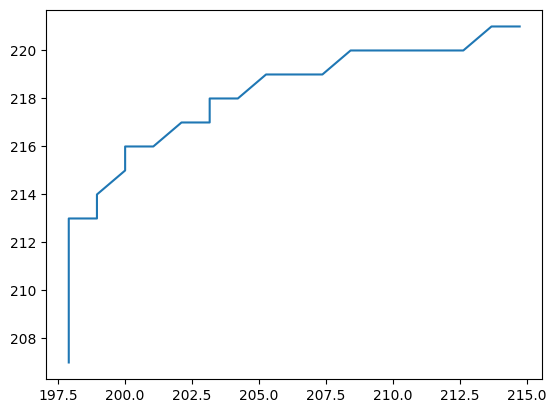

In [50]:
plt.plot(r2["X"], r2["y"])

In [18]:
controls

,Filename,X,y
0,./data/hw_dataset/control/C_0001.txt,"[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200...","[204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204..."
1,./data/hw_dataset/control/C_0002.txt,"[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200...","[204.0, 204.0, 204.0, 204.0, 204.0, 205.0, 205..."
2,./data/hw_dataset/control/C_0003.txt,"[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200...","[204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204..."
3,./data/hw_dataset/control/C_0004.txt,"[200.0, 200.0, 200.0, 199.00202702702703, 199....","[204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204..."
4,./data/hw_dataset/control/C_0005.txt,"[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200...","[204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204..."
5,./data/hw_dataset/control/C_0006.txt,"[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 201...","[204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204..."
6,./data/hw_dataset/control/C_0007.txt,"[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200...","[204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204..."
7,./data/hw_dataset/control/C_0008.txt,"[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200...","[204.0, 204.0, 204.0, 204.0, 203.0, 203.0, 203..."
8,./data/hw_dataset/control/C_0009.txt,"[200.0, 200.0, 200.0, 200.0, 200.0, 200.0, 200...","[204.0, 204.0, 204.0, 204.0, 204.0, 204.0, 204..."


In [21]:
data_premade

,X,y,index,target
0,"[-2.056546340567396, -2.056546340567396, -1.47...","[-1.3952663046302018, -1.3952663046302018, -1....",70473,"[1.4489303763088408, 1.8748890968469032]"
1,"[1.66737406371331, 1.66737406371331, 1.6673740...","[-1.9952172111690554, -1.9952172111690554, -1....",74844,"[-1.7725966988020012, 2.7933040956366777]"
2,"[0.18022639872047436, -0.056913599595946544, -...","[-1.6533837631420183, -1.5283169126774179, -1....",95145,"[2.788766380201092, 1.973554900331396]"
3,"[-1.8480943565342245, -1.7263490102539736, -1....","[1.803269661665738, 1.3158994828371586, 1.3158...",55640,"[1.499902666172703, -2.0956917689628964]"
4,"[-2.2259955480133455, -1.8726629213445662, -1....","[1.7763555742918122, 1.680749784502156, 1.4895...",31735,"[2.0139959720120904, -2.0478760172944392]"
...,...,...,...,...
32189,"[-1.9470036496822107, -1.9470036496822107, -1....","[-2.201704178130174, -2.201704178130174, -2.20...",139013,"[1.7265881421710167, 1.7704425349912787]"
32190,"[2.2845990353241943, 2.2845990353241943, 2.284...","[2.1226745220209273, 2.1226745220209273, 2.122...",93198,"[-0.8449886842978346, -1.288766674084138]"
32191,"[1.6461582494510627, 1.4821982644459757, 1.482...","[-1.5432260242699338, -1.444554283587713, -1.4...",42403,"[-1.633041450650661, 1.7129414182433536]"
32192,"[-1.9279335090084688, -1.9279335090084688, -1....","[-0.8164965809276795, -0.8164965809276795, -0....",62161,"[1.2675363954254597, 1.2247448713916351]"


In [22]:
data_original

,Filename,index,angle,X,y,length
0,./data/hw_dataset/parkinson/P_02100001.txt,51,144,"[197.8960113960114, 197.8960113960114, 197.896...","[207.0, 207.0, 207.0, 208.0, 208.0, 208.0, 209...",50
1,./data/hw_dataset/parkinson/P_02100001.txt,52,21,"[197.8960113960114, 197.8960113960114, 197.896...","[207.0, 207.0, 208.0, 208.0, 208.0, 209.0, 209...",50
2,./data/hw_dataset/parkinson/P_02100001.txt,53,117,"[197.8960113960114, 197.8960113960114, 197.896...","[207.0, 208.0, 208.0, 208.0, 209.0, 209.0, 209...",50
3,./data/hw_dataset/parkinson/P_02100001.txt,54,282,"[197.8960113960114, 197.8960113960114, 197.896...","[208.0, 208.0, 208.0, 209.0, 209.0, 209.0, 209...",50
4,./data/hw_dataset/parkinson/P_02100001.txt,55,142,"[197.8960113960114, 197.8960113960114, 197.896...","[208.0, 208.0, 209.0, 209.0, 209.0, 209.0, 210...",50
...,...,...,...,...,...,...
162362,./data/new_dataset/parkinson/H_p000-0043.txt,1755,19,"[395.7121409921671, 395.7121409921671, 396.676...","[215.0, 208.0, 202.0, 197.0, 193.0, 190.0, 188...",50
162363,./data/new_dataset/parkinson/H_p000-0043.txt,1756,35,"[395.7121409921671, 396.6762402088773, 396.676...","[208.0, 202.0, 197.0, 193.0, 190.0, 188.0, 186...",50
162364,./data/new_dataset/parkinson/H_p000-0043.txt,1757,199,"[396.6762402088773, 396.6762402088773, 397.640...","[202.0, 197.0, 193.0, 190.0, 188.0, 186.0, 186...",50
162365,./data/new_dataset/parkinson/H_p000-0043.txt,1758,306,"[396.6762402088773, 397.64033942558746, 398.60...","[197.0, 193.0, 190.0, 188.0, 186.0, 186.0, 186...",50


In [23]:
print(len(data_premade))

160967


In [81]:
from scipy.spatial import KDTree
# Precompute KDTree for each control file
control_trees = []
for index, control_file in controls.iterrows():
    control_data = np.column_stack((control_file["X"], control_file["y"]))
    control_trees.append(KDTree(control_data))

In [82]:
from scipy.spatial import KDTree
from tqdm import tqdm
import numpy as np

org_mse = []
mean_square_errors = []
translated = {"X":[], "y":[]}

for _, row in tqdm(data_premade.iterrows(), total=len(data_premade)):  # Include progress bar
    data_find = data_original.loc[row['index']] # Finding row which matches 'index' arg of the row in data_premade 
    points = np.column_stack((data_find["X"], data_find["y"]))
    min_mse = float("inf")
    min_close_seg = 0 # This is the cloest segment
    for tree in control_trees:
        distances, indices = tree.query(points)
        closest_segments = np.array([tree.data[idx] for idx in indices])
        
        mse = np.sum((closest_segments - points) ** 2)
        if mse < min_mse:
            min_mse = mse
            min_close_seg = closest_segments
    
    offset_x = min_close_seg[:, 0] - points[:, 0]
    offset_y = min_close_seg[:, 1] - points[:, 1]

    # Calculate the average offset for X and Y directions
    avg_offset_x = np.mean(offset_x)
    avg_offset_y = np.mean(offset_y)

    # Apply the translations to the orange line
    orange_line_x_translated = min_close_seg[:, 0] - avg_offset_x
    orange_line_y_translated = min_close_seg[:, 1] - avg_offset_y
    translated["X"].append(orange_line_x_translated)
    translated["y"].append(orange_line_y_translated)

    temp = np.column_stack((orange_line_x_translated, orange_line_y_translated))
    mse = np.sum((temp - points) ** 2)
    mean_square_errors.append(mse)
    org_mse.append(min_mse)
    



100%|██████████| 160967/160967 [03:03<00:00, 878.17it/s] 


In [83]:
translated = pd.DataFrame(translated)

In [84]:
def reject_outliers(data, m=4.):
    ranged = range(0,len(data))
    data = np.asarray(data)  # Ensure input is a NumPy array
    d = np.abs(data - np.median(data))  # Deviation from the median
    mdev = np.median(d)  # Median of the deviations
    if mdev == 0:  # Handle case where mdev is zero
        return data
    s = d / mdev
    ranged = np.where(s<m)[0]
    return data[s < m], ranged 

In [85]:
data_no_outliers, ranged = reject_outliers(mean_square_errors)

In [86]:
ranged

array([   100,    101,    102, ..., 160127, 160128, 160129])

In [87]:
import pickle
data = {'translated': translated, 'ranged': ranged}
# Save the data to a PKL file
with open('data/smooth_translated.pkl', 'wb') as file:
    pickle.dump(data, file)

# Getting Angle + Normalize???

In [88]:
from scipy.spatial import KDTree
from tqdm import tqdm
import numpy as np

In [89]:
import pickle
with open('data/smooth_translated.pkl', 'rb') as file:
    loaded_data = pickle.load(file)
translated = loaded_data['translated']
ranged = loaded_data['ranged']

In [90]:
translated

,X,y
0,"[200.80408955778523, 200.80408955778523, 200.8...","[214.24, 214.24, 214.24, 214.24, 214.24, 214.2..."
1,"[201.08149588133284, 201.08149588133284, 201.0...","[214.54, 214.54, 214.54, 214.54, 214.54, 214.5..."
2,"[201.37994209092037, 201.37994209092037, 201.3...","[214.84, 214.84, 214.84, 214.84, 214.84, 214.8..."
3,"[201.69942818654775, 201.69942818654775, 201.6...","[215.14, 215.14, 215.14, 215.14, 215.14, 215.1..."
4,"[202.03995416821505, 202.03995416821505, 202.0...","[215.42, 215.42, 215.42, 215.42, 215.42, 215.4..."
...,...,...
160962,"[393.8432636362339, 394.8521434176547, 393.843...","[208.12, 201.12, 196.12, 191.12, 191.12, 191.1..."
160963,"[394.84945658377205, 393.8405768023513, 396.86...","[200.8, 195.8, 190.8, 190.8, 190.8, 190.8, 190..."
160964,"[393.89663153276547, 396.9232708770278, 396.92...","[195.48, 190.48, 190.48, 190.48, 190.48, 190.4..."
160965,"[396.95914801181357, 396.95914801181357, 396.9...","[190.18, 190.18, 190.18, 190.18, 190.18, 190.1..."


In [91]:
len(ranged)

130761

In [92]:

def get_subset(original, premade, compiled, indexes): 
    #  format ([Xi, X2. . . Xf], [yi, y2, . . . yf])
    subset = []
    for _ in tqdm(indexes): # was len(X)
        ind = premade.iloc[_]['index']
        row = original.iloc[ind] #idt this angle is right 
        compiled_row = compiled.iloc[_]

        angle = row["angle"] # Replace with my angle 
        theta = np.radians(angle)  # Convert the angle to radians
        rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], 
                                    [np.sin(theta), np.cos(theta)]])
        
        combined_array = np.column_stack((compiled_row["X"], compiled_row["y"]))

        rotated = np.dot(combined_array, rotation_matrix)
        shape = 50
        X_all = combined_array[:, 0 ] # This is for X data and x coordinate value
        Y_all = combined_array[:, 1 ]
    
        subset.append((row["Filename"], _, angle, X_all, Y_all, shape))
    return subset


In [93]:
data_original

,Filename,index,angle,X,y,length
0,./data/hw_dataset/parkinson/P_02100001.txt,51,144,"[197.8960113960114, 197.8960113960114, 197.896...","[207.0, 207.0, 207.0, 208.0, 208.0, 208.0, 209...",50
1,./data/hw_dataset/parkinson/P_02100001.txt,52,21,"[197.8960113960114, 197.8960113960114, 197.896...","[207.0, 207.0, 208.0, 208.0, 208.0, 209.0, 209...",50
2,./data/hw_dataset/parkinson/P_02100001.txt,53,117,"[197.8960113960114, 197.8960113960114, 197.896...","[207.0, 208.0, 208.0, 208.0, 209.0, 209.0, 209...",50
3,./data/hw_dataset/parkinson/P_02100001.txt,54,282,"[197.8960113960114, 197.8960113960114, 197.896...","[208.0, 208.0, 208.0, 209.0, 209.0, 209.0, 209...",50
4,./data/hw_dataset/parkinson/P_02100001.txt,55,142,"[197.8960113960114, 197.8960113960114, 197.896...","[208.0, 208.0, 209.0, 209.0, 209.0, 209.0, 210...",50
...,...,...,...,...,...,...
162362,./data/new_dataset/parkinson/H_p000-0043.txt,1755,19,"[395.7121409921671, 395.7121409921671, 396.676...","[215.0, 208.0, 202.0, 197.0, 193.0, 190.0, 188...",50
162363,./data/new_dataset/parkinson/H_p000-0043.txt,1756,35,"[395.7121409921671, 396.6762402088773, 396.676...","[208.0, 202.0, 197.0, 193.0, 190.0, 188.0, 186...",50
162364,./data/new_dataset/parkinson/H_p000-0043.txt,1757,199,"[396.6762402088773, 396.6762402088773, 397.640...","[202.0, 197.0, 193.0, 190.0, 188.0, 186.0, 186...",50
162365,./data/new_dataset/parkinson/H_p000-0043.txt,1758,306,"[396.6762402088773, 397.64033942558746, 398.60...","[197.0, 193.0, 190.0, 188.0, 186.0, 186.0, 186...",50


In [94]:
subset = get_subset(data_original,data_premade, translated, ranged)

100%|██████████| 130761/130761 [00:08<00:00, 14562.31it/s]


In [95]:
df = pd.DataFrame(subset, columns=['Filename', 'index', 'angle', 'X', 'y', 'length']) 
df.to_pickle("data/control_original.pkl") # original = with the angles, premade = parkinson

In [96]:
import pickle as pkl
def save_data_mean_std_all(arrX, arrY, index, filename):
    normalized_data = {'X':[], 'y':[], 'index':[]}
    df = pd.DataFrame()
    for i in tqdm(range(len(arrX))):
        innerX = arrX[i]
        innerY = arrY[i]
        meanX = np.mean(innerX)
        stdX = np.std(innerX)
        meanY = np.mean(innerY)
        stdY = np.std(innerY)
        normalized_arr_X = (innerX - meanX) / stdX
        normalized_arr_y = (innerY - meanY) / stdY

        if not np.isnan(normalized_arr_X[0]) and not np.isnan(normalized_arr_y[0]): 
            normalized_data['X'].append(normalized_arr_X)
            normalized_data['y'].append(normalized_arr_y)
            normalized_data['index'].append(index[i])
    data = pd.DataFrame(normalized_data)
    data.to_pickle(filename)
    return data
    

In [97]:
arrX = list(df['X'].copy())
arrY = list(df['y'].copy())
index = list(df['index'].copy())
control_set = save_data_mean_std_all(arrX, arrY, index,'data/premade_data_all.pkl')

  0%|          | 0/130761 [00:00<?, ?it/s]C:\Users\leahz\AppData\Local\Temp\ipykernel_9756\2043971446.py:13: RuntimeWarning: invalid value encountered in divide
  normalized_arr_y = (innerY - meanY) / stdY
C:\Users\leahz\AppData\Local\Temp\ipykernel_9756\2043971446.py:12: RuntimeWarning: invalid value encountered in divide
  normalized_arr_X = (innerX - meanX) / stdX
100%|██████████| 130761/130761 [00:03<00:00, 34883.71it/s]


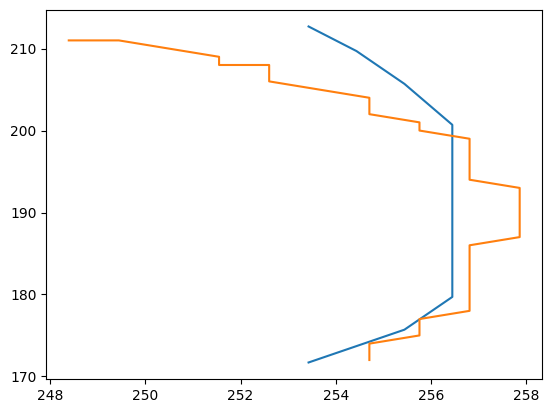

In [98]:
r = df.iloc[2]
r2 = data_original.iloc[r['index']]
plt.plot(r["X"], r["y"])

plt.plot(r2["X"], r2["y"])

# Model

In [1]:
import pandas as pd
import numpy as np
import tqdm as tqdm
import matplotlib.pyplot as plt
base = "C:/Users/leahz/OneDrive/Desktop/Quizlet/ATC4/SYSlab"
parkinson =  pd.read_pickle(f'{base}/data/data_all.pkl')  # has more data; but when indexed should preform well
control = pd.read_pickle("data/premade_data_all.pkl")

In [2]:
parkinson

,X,y,index
0,"[-0.7585194642073478, -0.7585194642073478, -0....","[-1.632862912807799, -1.632862912807799, -1.63...",0
1,"[-0.7779893923724863, -0.7779893923724863, -0....","[-1.703897682407522, -1.703897682407522, -1.47...",1
2,"[-0.7976091427589089, -0.7976091427589089, -0....","[-1.782999851892831, -1.5514414295690864, -1.5...",2
3,"[-0.8175074722161106, -0.8175074722161106, -0....","[-1.6370549635770795, -1.6370549635770795, -1....",3
4,"[-0.8377859869858639, -0.8377859869858639, -0....","[-1.7130445635821479, -1.7130445635821479, -1....",4
...,...,...,...
160962,"[-0.11624763874380539, -0.11624763874380539, 0...","[1.9139640342315782, 1.261688073198421, 0.7025...",162362
160963,"[-0.13945205043010517, 0.27070103907012877, 0....","[1.357624551977322, 0.7839803750854953, 0.3059...",162363
160964,"[0.22194280274512782, 0.22194280274512782, 0.6...","[0.8395427112010607, 0.3581535419343974, -0.02...",162364
160965,"[0.17425742638841127, 0.5530779185371246, 0.93...","[0.39508575304417465, 0.011507352030413276, -0...",162365


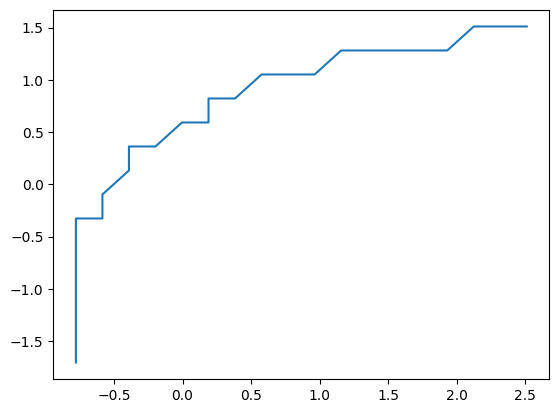

In [3]:
plt.plot(parkinson.iloc[1]['X'], parkinson.iloc[1]['y'])

In [4]:
control

,X,y,index
0,"[-1.5957367207642525, -1.5957367207642525, -1....","[1.4001876904675192, 1.4001876904675192, 1.400...",100
1,"[-1.5957367207641846, -1.5957367207641846, -1....","[1.4518095247164289, 1.4518095247164289, 1.451...",101
2,"[-1.5957367207642073, -1.5957367207642073, -1....","[1.5084025690018612, 1.5084025690018612, 1.508...",102
3,"[-1.5312500000000024, -1.5312500000000024, -1....","[1.5612967535335225, 1.5612967535335225, 1.561...",103
4,"[-1.4722339938012692, -1.4722339938012692, -1....","[1.6204340836068207, 1.6204340836068207, 1.620...",104
...,...,...,...
127732,"[-1.4383093525060813, -1.5893922676852865, -1....","[1.2717089907347563, 1.3387115719115086, 1.338...",160125
127733,"[-1.6561267709147742, -1.6561267709147742, -1....","[1.3908565787714071, 1.3908565787714071, 1.457...",160126
127734,"[-1.7410190600064872, -1.7410190600064872, -1....","[1.4515057904657889, 1.5189236163118545, 1.586...",160127
127735,"[-1.835470389878543, -1.9939738777782583, -1.9...","[1.5861865967510733, 1.6542925047266452, 1.688...",160128


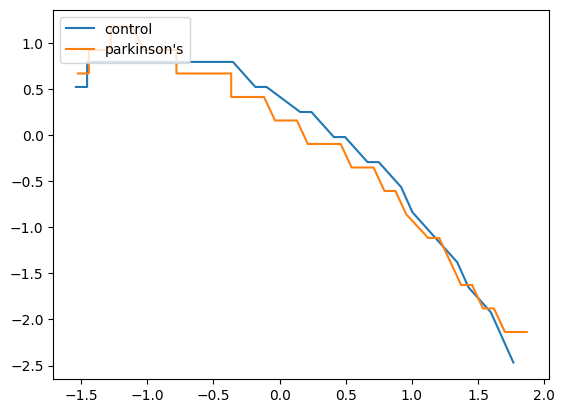

In [9]:
r = control.iloc[200]
r2 = parkinson.iloc[r['index']]
plt.plot(r["X"], r["y"], label="control")

plt.plot(r2["X"], r2["y"], label="parkinson's")
plt.legend(loc="upper left")
plt.show()

In [5]:
parkinson_mod = parkinson.loc[control['index']]

In [6]:
control_X = np.array(control['X'])
control_y = np.array(control['y'])
parkinson_X = np.array(parkinson_mod['X'])
parkinson_y = np.array(parkinson_mod['y'])

In [7]:
X = []
for i in tqdm.tqdm(range(len(control_X))):
    exp = np.column_stack((control_X[i], control_y[i]))
    X.append(exp)

100%|██████████| 127737/127737 [00:00<00:00, 445723.62it/s]


In [8]:
y = []
for i in tqdm.tqdm(range(len(parkinson_X))):
    exp = np.column_stack((parkinson_X[i], parkinson_y[i]))
    y.append(exp)

100%|██████████| 127737/127737 [00:00<00:00, 436668.51it/s]


In [12]:
X = np.array(X)
y = np.array(y)

In [13]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [15]:
print(X_train.shape)
print(y_train.shape)

(85583, 50, 2)
(85583, 50, 2)


In [ ]:
print(y_train)

In [15]:
X[0].shape

(50, 2)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed

# Define the model
model = Sequential([
    # LSTM layer to process sequences
    LSTM(64, return_sequences=True, input_shape=(50, 2)),
    
    # Another LSTM layer (optional, for better sequence learning)
    LSTM(32, return_sequences=True),
    
    # TimeDistributed Dense layer for output (2 features at each timestep)
    TimeDistributed(Dense(2))
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print the model summary
model.summary()

c:\Users\leahz\anaconda3\envs\AIR\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 64)         │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 50, 2)          │            66 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,634 (115.76 KB)

 Trainable params: 29,634 (115.76 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # Use 20% of the data for validation
    epochs=20,            # Number of training epochs
    batch_size=32         # Adjust batch size if needed
)

Epoch 1/20
2140/2140 ━━━━━━━━━━━━━━━━━━━━ 79s 36ms/step - loss: 0.2398 - mae: 0.2916 - val_loss: 0.1642 - val_mae: 0.2202
Epoch 2/20
2140/2140 ━━━━━━━━━━━━━━━━━━━━ 108s 50ms/step - loss: 0.1634 - mae: 0.2226 - val_loss: 0.1615 - val_mae: 0.2197
Epoch 3/20
2140/2140 ━━━━━━━━━━━━━━━━━━━━ 98s 30ms/step - loss: 0.1598 - mae: 0.2189 - val_loss: 0.1580 - val_mae: 0.2119
Epoch 4/20
2140/2140 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - loss: 0.1578 - mae: 0.2161 - val_loss: 0.1561 - val_mae: 0.2135
Epoch 5/20
2140/2140 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - loss: 0.1565 - mae: 0.2153 - val_loss: 0.1540 - val_mae: 0.2115
Epoch 6/20
2140/2140 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - loss: 0.1519 - mae: 0.2113 - val_loss: 0.1530 - val_mae: 0.2127
Epoch 7/20
2140/2140 ━━━━━━━━━━━━━━━━━━━━ 57s 26ms/step - loss: 0.1518 - mae: 0.2110 - val_loss: 0.1520 - val_mae: 0.2131
Epoch 8/20
2140/2140 ━━━━━━━━━━━━━━━━━━━━ 54s 25ms/step - loss: 0.1513 - mae: 0.2114 - val_loss: 0.1513 - val_mae: 0.2102
Epoch 9/20
2140/2140 ━━

In [21]:
model.save("./model/smoothing.keras")

In [24]:
atp =  tf.keras.models.load_model('./model/smoothing.keras')

c:\Users\leahz\anaconda3\envs\AIR\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [25]:
atp

<Sequential name=sequential, built=True>

In [ ]:

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Make predictions
predictions = model.predict(X_test)

# Example: Predict the blue line for a new orange line
new_orange_line = np.array([-2.1832400154313] * X.shape[1])  # Replace with actual data
predicted_blue_line = model.predict(new_orange_line.reshape(1, -1))
print("Predicted Blue Line:", predicted_blue_line)